In [ ]:
import pandas as pd
file_list_4 = ['4096_64_llong.txt','4096_32_llong.txt']
file_list_32 = ['32768_64_llong.txt','32768_32_llong.txt']

def get_stats(file):
    table_data = []

    with open(file,'r') as f:
        content = f.read()
        # this line splits the file to capture only data
        chunk = content.split('sim: ** simulation statistics **')[1]

        for line in chunk.splitlines():
            line_ = line.split('#')[0]
            splt_line = line.split()
            table_data.append(line_.split())
            
    df = pd.DataFrame(table_data, columns=['Variable', 'Value'])

    return df

list_of_df = []

for file in file_list_32:
    list_of_df.append(get_stats(file))

for file in file_list_4:
    list_of_df.append(get_stats(file))


reshaped_dfs = []

df_names = ['32768_64', '32768_32', '4096_64', '4096_32']
for idx, df in enumerate(list_of_df):

    df_reshaped = df.set_index('Variable')['Value']
    df_reshaped.name = df_names[idx]  # Set the name of series to the df name
    reshaped_dfs.append(df_reshaped)

df_combined = pd.concat(reshaped_dfs, axis=1)

# get list of metrics that are different between sets
different_values_rows = df_combined[df_combined.nunique(axis=1) > 1]
# print dataframe 
different_values_rows



,32768_64,32768_32,4096_64,4096_32
Variable,,,,
sim_num_insn,20484,20484,189388,189388
sim_num_refs,6502,6502,47619,47619
sim_num_loads,2069,2069,27091,27091
sim_num_stores,4433.0000,4433.0000,20528.0000,20528.0000
sim_num_branches,3485,3485,32161,32161
...,...,...,...,...
ld_data_size,8192,8192,13028,13028
mem.page_count,26,26,33,33
mem.page_mem,104k,104k,132k,132k


,32768_64,32768_32,4096_64,4096_32
Variable,,,,
mem.ptab_accesses,579402,579424,1833058,1833112


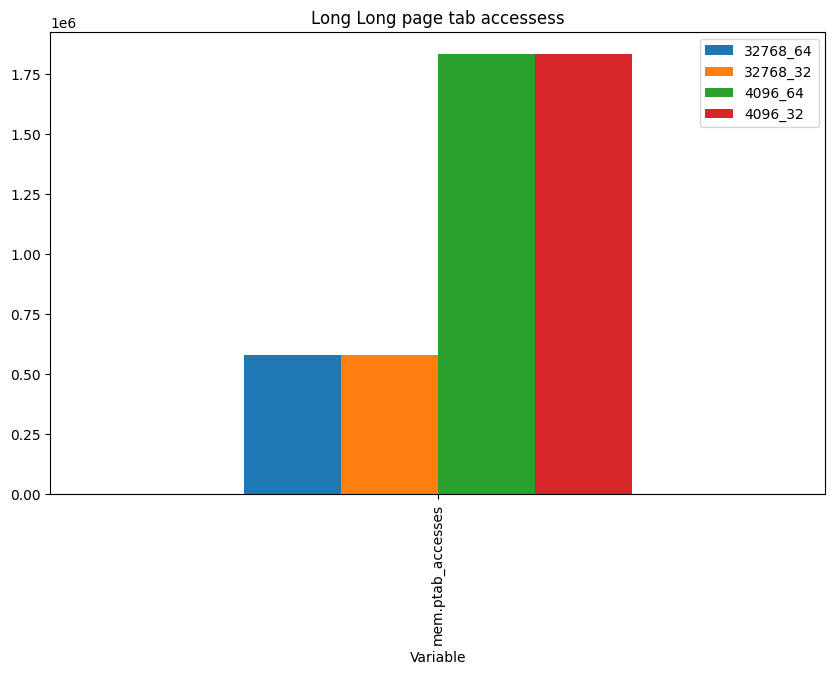

In [ ]:
import matplotlib.pyplot as plt
df_selected = different_values_rows.loc[['mem.ptab_accesses']]

df_selected = df_selected.apply(pd.to_numeric, errors='coerce')
df_selected.plot(kind='bar', figsize=(10,6))

plt.title('Long Long page tab accessess')


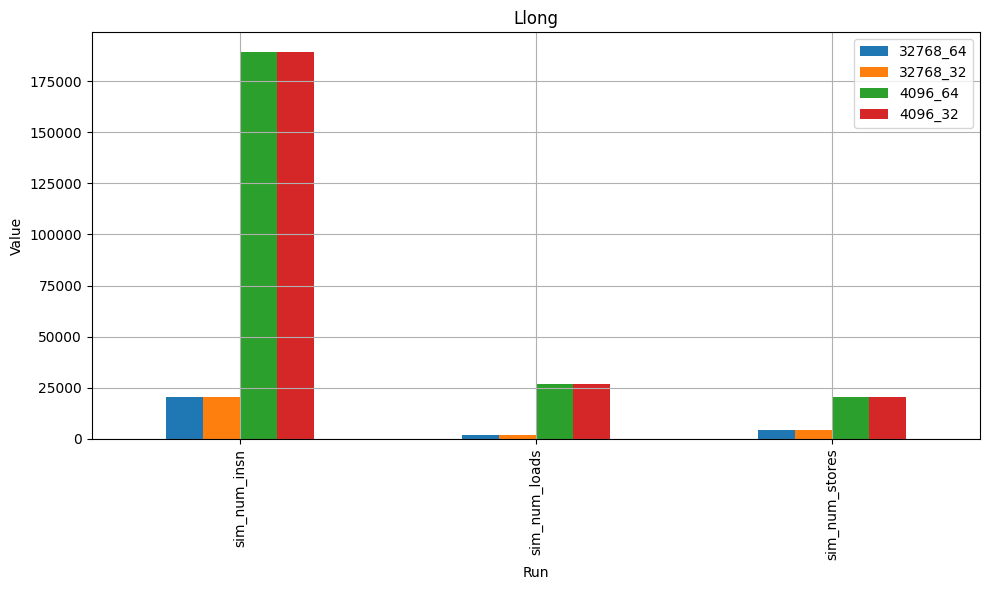

In [ ]:

df_selected = different_values_rows.loc[['sim_num_insn', 'sim_num_loads','sim_num_stores']]

df_selected = df_selected.apply(pd.to_numeric, errors='coerce')
df_selected.plot(kind='bar', figsize=(10,6))

plt.title('Llong')
plt.xlabel('Run')
plt.ylabel('Value')
plt.grid(True)

plt.tight_layout()
plt.show()